In [ ]:
import os

train_path = "/content/drive/MyDrive/Colab Notebooks/Workshop - 4/DevanagariHandwrittenDigitDataset/Train"
test_path = "/content/drive/MyDrive/Colab Notebooks/Workshop - 4/DevanagariHandwrittenDigitDataset/Test"

# Check if paths exist
print("Train path exists:", os.path.exists(train_path))
print("Test path exists:", os.path.exists(test_path))


Train path exists: True
Test path exists: True


✅ Dataset found! Loading images...
Training set: (17000, 28, 28, 1), Labels: (17000, 10)
Testing set: (3000, 28, 28, 1), Labels: (3000, 10)


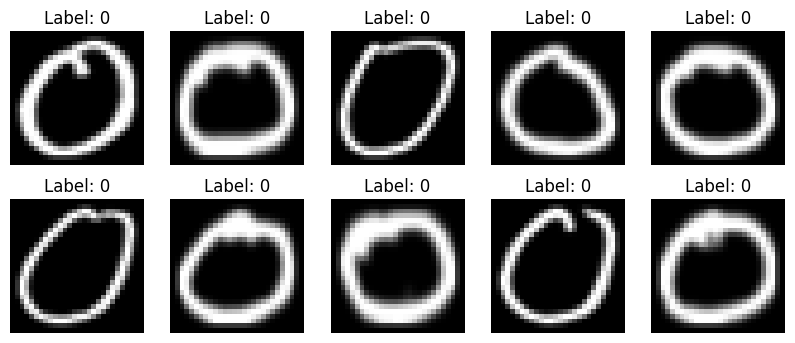

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from PIL import Image  # Import Pillow

# ✅ Correct dataset paths
train_dir = "/content/drive/MyDrive/Colab Notebooks/Workshop - 4/DevanagariHandwrittenDigitDataset/Train"
test_dir = "/content/drive/MyDrive/Colab Notebooks/Workshop - 4/DevanagariHandwrittenDigitDataset/Test"

# Define image size
img_height, img_width = 28, 28

# Function to load images and labels using PIL
def load_images_from_folder(folder):
    images = []
    labels = []

    # ✅ Check if the directory exists
    if not os.path.exists(folder):
        print(f"Error: Directory '{folder}' not found!")
        return np.array([]), np.array([])

    class_names = sorted(os.listdir(folder))  # Sorted class names (digit_0, digit_1, ...)
    class_map = {name: i for i, name in enumerate(class_names)}  # Map class names to labels

    for class_name in class_names:
        class_path = os.path.join(folder, class_name)
        label = class_map[class_name]

        for filename in os.listdir(class_path):
            img_path = os.path.join(class_path, filename)
            img = Image.open(img_path).convert("L")  # Convert to grayscale
            img = img.resize((img_width, img_height))  # Resize to (28,28)
            img = np.array(img) / 255.0  # Normalize pixel values to [0,1]
            images.append(img)
            labels.append(label)

    return np.array(images), np.array(labels)

# ✅ Check if paths exist before loading
if os.path.exists(train_dir) and os.path.exists(test_dir):
    print("✅ Dataset found! Loading images...")
    x_train, y_train = load_images_from_folder(train_dir)
    x_test, y_test = load_images_from_folder(test_dir)
else:
    print("❌ Dataset path is incorrect. Check Google Drive!")

# Reshape images for Keras input
x_train = x_train.reshape(-1, img_height, img_width, 1)
x_test = x_test.reshape(-1, img_height, img_width, 1)

# One-hot encode labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Print dataset shape
print(f"Training set: {x_train.shape}, Labels: {y_train.shape}")
print(f"Testing set: {x_test.shape}, Labels: {y_test.shape}")

# Visualize some images
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {np.argmax(y_train[i])}")
    plt.axis("off")
plt.show()


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Normalize the images to values between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0
# Flatten the 28x28 images into 784-dimensional vectors
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)
# One-hot encode the labels (0-9) for classification
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Model parameters
import tensorflow as tf
from tensorflow import keras

num_classes = 10
input_shape = (28, 28, 1)

# ✅ Fix: Correct indentation
def build_functional_model():
    # Input layer
    inputs = keras.Input(shape=input_shape)

    # Flatten layer
    x = keras.layers.Flatten()(inputs)

    # Hidden layers
    x = keras.layers.Dense(64, activation="sigmoid")(x)
    x = keras.layers.Dense(128, activation="sigmoid")(x)
    x = keras.layers.Dense(256, activation="sigmoid")(x)

    # Output layer
    outputs = keras.layers.Dense(num_classes, activation="softmax")(x)

    # Create model
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

# ✅ Build the model
functional_model = build_functional_model()
functional_model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,154 (367.79 KB)

 Trainable params: 94,154 (367.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Clear any previous session or model
tf.keras.backend.clear_session()

# Ensure x_train is reshaped properly
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Ensure the data type is float32
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")

# If model is already compiled, skip compiling again
# Rebuild the model to avoid any potential issues
functional_model = build_functional_model()

# Compile the model (only once)
functional_model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=["accuracy"]
)

# Train the model
functional_model.fit(
    x=x_train,
    y=y_train,
    batch_size=32,
    epochs=10,
    validation_data=(x_test, y_test),
    validation_split=0.1,
    verbose=1
)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.6816 - loss: 0.9848 - val_accuracy: 0.9367 - val_loss: 0.2152
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9418 - loss: 0.1935 - val_accuracy: 0.9517 - val_loss: 0.1583
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9589 - loss: 0.1415 - val_accuracy: 0.9586 - val_loss: 0.1334
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9664 - loss: 0.1093 - val_accuracy: 0.9620 - val_loss: 0.1289
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9728 - loss: 0.0898 - val_accuracy: 0.9619 - val_loss: 0.1200
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9765 - loss: 0.0747 - val_accuracy: 0.9703 - val_loss: 0.0998
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9796 - loss: 0.0645 - val_accuracy: 0.9705 - val_loss: 0.1026
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9828 - loss: 0.0540 

In [ ]:
# Define batch size and number of epochs
batch_size = 32  # You can adjust this number
epochs = 10  # You can adjust this number

# Example callback (EarlyStopping)
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)]

# Now, train the model
history = functional_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.15,
    callbacks=callbacks,
    verbose=1
)


Epoch 1/10
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9882 - loss: 0.0376 - val_accuracy: 0.9901 - val_loss: 0.0339
Epoch 2/10
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9911 - loss: 0.0301 - val_accuracy: 0.9859 - val_loss: 0.0469
Epoch 3/10
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9905 - loss: 0.0282 - val_accuracy: 0.9876 - val_loss: 0.0381
Epoch 4/10
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9930 - loss: 0.0234 - val_accuracy: 0.9872 - val_loss: 0.0412


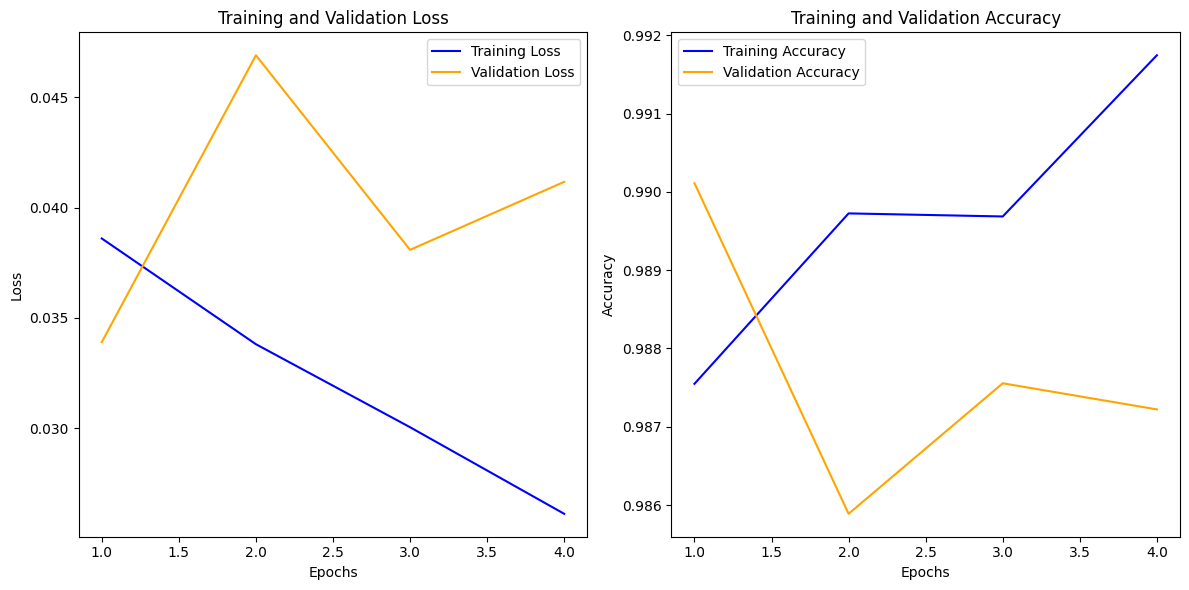

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'history' is the object returned by model.fit()
# Extracting training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Extracting training and validation accuracy (if metrics were specified)
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plotting training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss', color='blue')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy', color='blue')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Predict on test data
predictions = model.predict(x_test)
# Convert predictions from probabilities to digit labels
predicted_labels = np.argmax(predictions, axis=1)
# Check the first prediction
print(f"Predicted label for first image: {predicted_labels[0]}")
print(f"True label for first image: {np.argmax(y_test[0])}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Predicted label for first image: 2
True label for first image: 7


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Step 1: Build the FCN Model
def build_fcn_model(input_shape=(28, 28, 1), num_classes=10):
    model = models.Sequential()

    # Flatten input layer
    model.add(layers.Flatten(input_shape=input_shape))  # Flatten the input image to 1D vector

    # Add the hidden layers
    model.add(layers.Dense(64, activation='sigmoid'))  # First hidden layer with 64 neurons
    model.add(layers.Dense(128, activation='sigmoid'))  # Second hidden layer with 128 neurons
    model.add(layers.Dense(256, activation='sigmoid'))  # Third hidden layer with 256 neurons

    # Add the output layer with softmax activation
    model.add(layers.Dense(num_classes, activation='softmax'))  # Output layer for 10 classes

    return model

# Step 2: Create the model
fcn_model = build_fcn_model()

# Step 3: Display the model summary
fcn_model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,154 (367.79 KB)

 Trainable params: 94,154 (367.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Step 1: Compile the model
fcn_model.compile(
    optimizer='adam',                  # Optimizer: Adam is a good choice for most tasks
    loss='sparse_categorical_crossentropy',  # Loss function: suitable for multi-class classification
    metrics=['accuracy']               # Evaluation metric: accuracy
)

# Step 2: Print the model summary to verify it's ready for training
fcn_model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,154 (367.79 KB)

 Trainable params: 94,154 (367.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
103/107 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2857 - loss: 1.9709
Epoch 1: val_loss improved from inf to 7.48944, saving model to best_model.h5


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.2940 - loss: 1.9546 - val_accuracy: 0.0000e+00 - val_loss: 7.4894
Epoch 2/20
 98/107 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7894 - loss: 0.6831
Epoch 2: val_loss did not improve from 7.48944
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7919 - loss: 0.6709 - val_accuracy: 0.0000e+00 - val_loss: 8.9226
Epoch 3/20
101/107 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8771 - loss: 0.3455
Epoch 3: val_loss did not improve from 7.48944
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8782 - loss: 0.3432 - val_accuracy: 0.0000e+00 - val_loss: 9.5526
Epoch 4/20
104/107 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9298 - loss: 0.2297
Epoch 4: val_loss did not improve from 7.48944
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9300 - loss: 0.2291 - val_accuracy: 0.0000e+00 - val_loss: 9.9028
Epoch 4: early stopping
Restoring model weights from the end of the best epoch: 1.


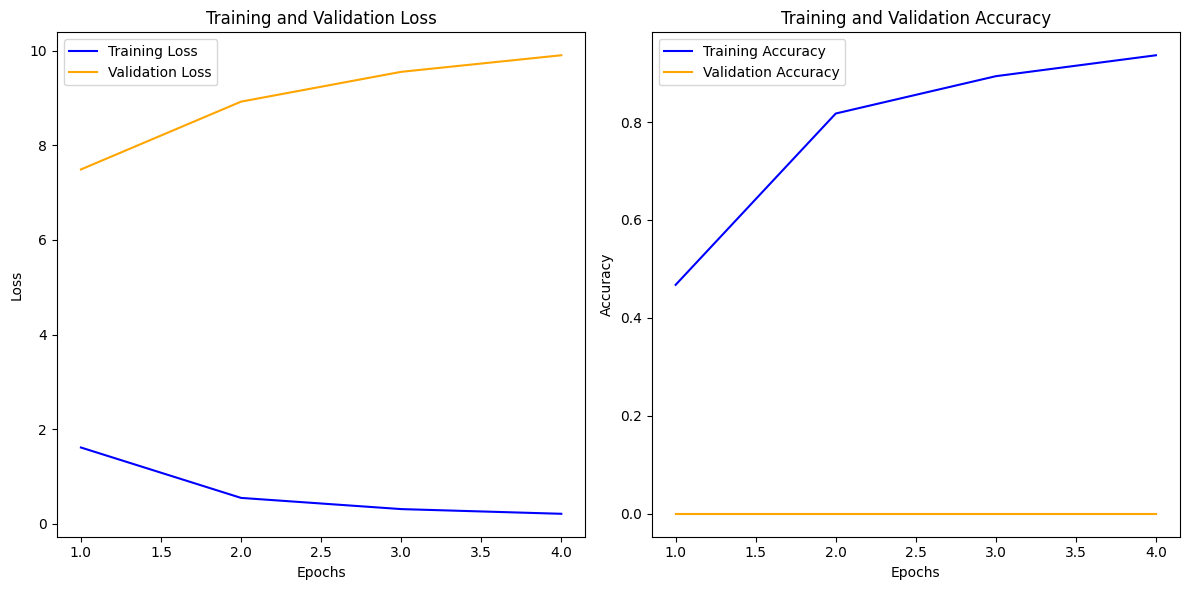

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
from PIL import Image

# Step 1: Define dataset paths
train_dir = "/content/drive/MyDrive/Colab Notebooks/Workshop - 4/DevanagariHandwrittenDigitDataset/Train"
test_dir = "/content/drive/MyDrive/Colab Notebooks/Workshop - 4/DevanagariHandwrittenDigitDataset/Test"

# Step 2: Define image size
img_height, img_width = 28, 28

# Step 3: Function to load images and labels
def load_images_from_folder(folder):
    images = []
    labels = []
    class_names = sorted(os.listdir(folder))  # Sorted class names (digit_0, digit_1, ...)
    class_map = {name: i for i, name in enumerate(class_names)}  # Map class names to labels
    for class_name in class_names:
        class_path = os.path.join(folder, class_name)
        label = class_map[class_name]
        for filename in os.listdir(class_path):
            img_path = os.path.join(class_path, filename)
            # Load image using PIL
            img = Image.open(img_path).convert("L")  # Convert to grayscale
            img = img.resize((img_width, img_height))  # Resize to (28, 28)
            img = np.array(img) / 255.0  # Normalize pixel values to [0, 1]
            images.append(img)
            labels.append(label)
    return np.array(images), np.array(labels)

# Step 4: Load training and testing datasets
x_train, y_train = load_images_from_folder(train_dir)
x_test, y_test = load_images_from_folder(test_dir)

# Step 5: Reshape images for Keras input
x_train = x_train.reshape(-1, img_height, img_width, 1)  # Shape (num_samples, 28, 28, 1)
x_test = x_test.reshape(-1, img_height, img_width, 1)

# Step 6: One-hot encode labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Step 7: Build the model (FCN)
def build_fcn_model():
    model = keras.Sequential([
        # Flatten layer
        keras.layers.Flatten(input_shape=(img_height, img_width, 1)),
        # Hidden layers
        keras.layers.Dense(64, activation='sigmoid'),
        keras.layers.Dense(128, activation='sigmoid'),
        keras.layers.Dense(256, activation='sigmoid'),
        # Output layer
        keras.layers.Dense(10, activation='softmax')
    ])
    return model

# Step 8: Compile the model
fcn_model = build_fcn_model()
fcn_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # Using categorical crossentropy for one-hot encoded labels
    metrics=['accuracy']
)

# Step 9: Set up callbacks
callbacks = [
    # Save the best model based on validation loss
    ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min', verbose=1),
    # Early stopping to avoid overfitting
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1)
]

# Step 10: Train the model
history = fcn_model.fit(
    x_train,                 # Training data
    y_train,                 # Training labels
    batch_size=128,          # Batch size
    epochs=20,               # Number of epochs
    validation_split=0.2,    # Use 20% of data for validation
    callbacks=callbacks,     # Callbacks for saving the best model and early stopping
    verbose=1                # Show progress
)

# Step 11: Plot training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(12, 6))

# Plotting training and validation loss
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss', color='blue')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy', color='blue')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Step 12: Evaluate the model on the test set
test_loss, test_acc = fcn_model.evaluate(x_test, y_test, verbose=1)

# Print the test accuracy and loss
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7700 - loss: 0.8945
Test Loss: 2.1809
Test Accuracy: 0.5920


In [ ]:
# Save the trained model in the Keras format (.keras)
fcn_model.save('/content/drive/MyDrive/Colab Notebooks/Workshop - 4/DevanagariHandwrittenDigitDataset/fcn_model.keras')
print("Model saved successfully in the Keras format!")


Model saved successfully in the Keras format!


Epoch 1/20
101/107 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2853 - loss: 2.0177

107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.2971 - loss: 1.9952 - val_accuracy: 0.0000e+00 - val_loss: 7.3122
Epoch 2/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7954 - loss: 0.6867 - val_accuracy: 0.0000e+00 - val_loss: 8.6350
Epoch 3/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8964 - loss: 0.3302 - val_accuracy: 0.0000e+00 - val_loss: 9.4051
Epoch 4/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9339 - loss: 0.2233 - val_accuracy: 0.0000e+00 - val_loss: 9.9543
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7617 - loss: 0.9587


Test Loss: 2.1643
Test Accuracy: 0.5927
Model saved successfully!


Model loaded successfully!
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7617 - loss: 0.9587
Test Loss after loading: 2.1643
Test Accuracy after loading: 0.5927


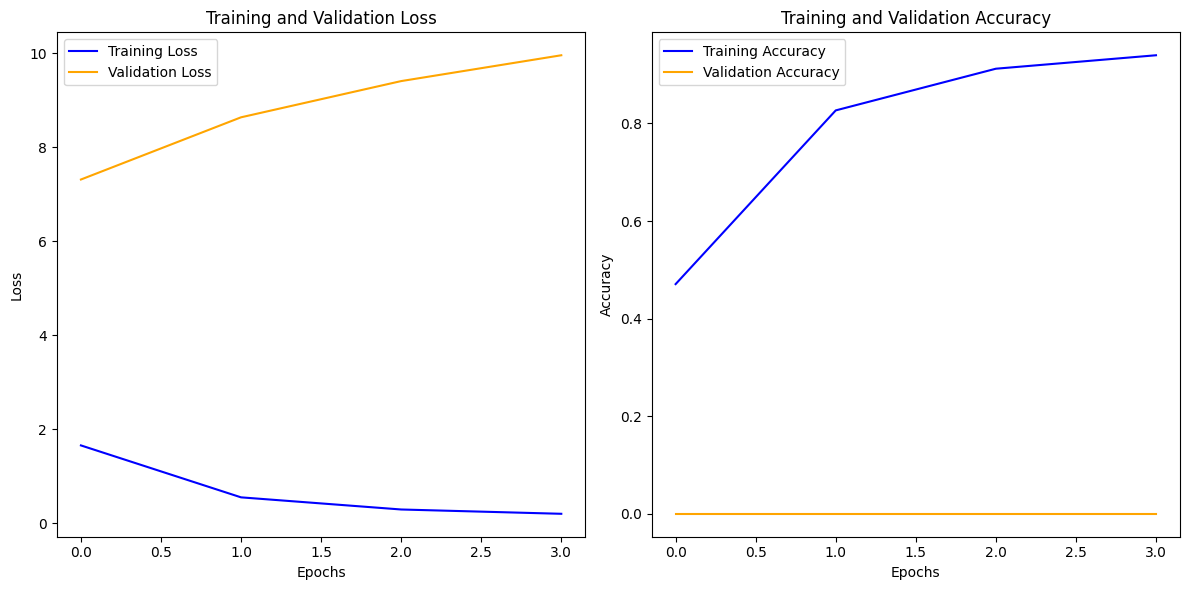

In [ ]:
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Set paths for dataset (adjust if needed)
train_dir = "/content/drive/MyDrive/Colab Notebooks/Workshop - 4/DevanagariHandwrittenDigitDataset/Train"
test_dir = "/content/drive/MyDrive/Colab Notebooks/Workshop - 4/DevanagariHandwrittenDigitDataset/Test"

# Load and preprocess data (images and labels)
def load_images_from_folder(folder):
    images = []
    labels = []
    class_names = sorted(os.listdir(folder))  # Sorted class names (digit_0, digit_1, ...)
    class_map = {name: i for i, name in enumerate(class_names)}  # Map class names to labels

    for class_name in class_names:
        class_folder = os.path.join(folder, class_name)
        for filename in os.listdir(class_folder):
            if filename.endswith('.png'):  # Only load PNG images
                img_path = os.path.join(class_folder, filename)
                img = keras.preprocessing.image.load_img(img_path, target_size=(28, 28), color_mode="grayscale")
                img_array = keras.preprocessing.image.img_to_array(img)
                img_array = img_array / 255.0  # Normalize to 0-1
                images.append(img_array)
                labels.append(class_map[class_name])

    return np.array(images), np.array(labels)

# Load training and testing datasets
x_train, y_train = load_images_from_folder(train_dir)
x_test, y_test = load_images_from_folder(test_dir)

# Convert labels to one-hot encoded format
y_train_one_hot = to_categorical(y_train, num_classes=10)
y_test_one_hot = to_categorical(y_test, num_classes=10)

# Build the FCN Model
def build_fcn_model(input_shape=(28, 28, 1), num_classes=10):
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=input_shape),  # Flatten the input
        keras.layers.Dense(64, activation='sigmoid'),  # 1st hidden layer
        keras.layers.Dense(128, activation='sigmoid'),  # 2nd hidden layer
        keras.layers.Dense(256, activation='sigmoid'),  # 3rd hidden layer
        keras.layers.Dense(num_classes, activation='softmax')  # Output layer
    ])
    return model

# Initialize the model
fcn_model = build_fcn_model()

# Compile the model using categorical crossentropy (since labels are one-hot encoded)
fcn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Define callbacks
checkpoint_callback = ModelCheckpoint("best_model.h5", save_best_only=True, monitor="val_loss", mode="min")
early_stopping_callback = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)

# Train the model
history = fcn_model.fit(
    x_train, y_train_one_hot,
    batch_size=128,
    epochs=20,
    validation_split=0.2,
    callbacks=[checkpoint_callback, early_stopping_callback],
    verbose=1
)

# Evaluate the model
test_loss, test_acc = fcn_model.evaluate(x_test, y_test_one_hot, verbose=1)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

# Save the model
fcn_model.save("fcn_model.h5")
print("Model saved successfully!")

# Load the saved model
loaded_model = load_model("fcn_model.h5")
print("Model loaded successfully!")

# Evaluate the loaded model on the test set
test_loss, test_acc = loaded_model.evaluate(x_test, y_test_one_hot, verbose=1)
print(f"Test Loss after loading: {test_loss:.4f}")
print(f"Test Accuracy after loading: {test_acc:.4f}")

# Plot training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Save the model in the recommended Keras format
fcn_model.save("fcn_model.keras")
print("Model saved successfully!")


Model saved successfully!


In [ ]:
# After loading the model, compile it before evaluating
loaded_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Now you can evaluate the model
test_loss, test_acc = loaded_model.evaluate(x_test, y_test_one_hot, verbose=1)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")


94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7617 - loss: 0.9587
Test Loss: 2.1643
Test Accuracy: 0.5927


In [ ]:
test_loss, test_acc = loaded_model.evaluate(x_test, y_test_one_hot, verbose=1)
print(f"Test Loss after loading: {test_loss:.4f}")
print(f"Test Accuracy after loading: {test_acc:.4f}")


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7617 - loss: 0.9587
Test Loss after loading: 2.1643
Test Accuracy after loading: 0.5927


In [ ]:
predictions = loaded_model.predict(x_test)
print(predictions[:5])  # Print the first 5 predictions


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
[[5.74346244e-01 4.27305587e-02 3.13051860e-03 3.96969356e-03
  7.90422317e-03 4.20740014e-03 6.21357262e-02 3.01035732e-01
  2.14217522e-04 3.25690431e-04]
 [5.46599388e-01 4.25026119e-02 4.18669824e-03 5.44716371e-03
  1.13590695e-02 6.16151188e-03 7.18026906e-02 3.11284751e-01
  2.53169186e-04 4.02930425e-04]
 [5.93443930e-01 3.32081728e-02 2.55309464e-03 3.30296392e-03
  8.54664389e-03 4.24164347e-03 4.51221019e-02 3.09097171e-01
  1.92324966e-04 2.91924516e-04]
 [5.26335061e-01 7.31800348e-02 7.20033795e-03 8.51987768e-03
  8.19751061e-03 5.30076493e-03 1.26930982e-01 2.43519962e-01
  3.05356662e-04 5.10100799e-04]
 [5.79976499e-01 4.41937260e-02 3.03403055e-03 3.78678297e-03
  6.84853783e-03 3.75739811e-03 6.08446337e-02 2.97037095e-01
  2.08210695e-04 3.13098892e-04]]


In [ ]:
import numpy as np

# Step 1: Make predictions on the test set
predictions = loaded_model.predict(x_test)

# Step 2: Convert predicted probabilities to digit labels (class with highest probability)
predicted_labels = np.argmax(predictions, axis=1)

# Step 3: Print the first few predictions and their corresponding labels
print("Predicted labels:", predicted_labels[:10])


94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Predicted labels: [0 0 0 0 0 0 0 0 0 0]


In [ ]:
# Importing necessary libraries
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split

# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load dataset
train_dir = '/content/drive/MyDrive/Colab Notebooks/Workshop - 4/DevanagariHandwrittenDigitDataset/Train'
test_dir = '/content/drive/MyDrive/Colab Notebooks/Workshop - 4/DevanagariHandwrittenDigitDataset/Test'

# Function to load images from a folder
def load_images_from_folder(folder, img_size=(28, 28)):
    images = []
    labels = []
    for label in os.listdir(folder):
        class_folder = os.path.join(folder, label)
        if os.path.isdir(class_folder):
            for filename in os.listdir(class_folder):
                img_path = os.path.join(class_folder, filename)
                img = image.load_img(img_path, target_size=img_size, color_mode="grayscale")
                img_array = np.array(img) / 255.0  # Normalize the image to 0-1
                images.append(img_array)
                labels.append(int(label.split('_')[1]))  # Extract the label from 'digit_0', 'digit_1', etc.
    return np.array(images), np.array(labels)

# Load the training and testing data
x_train, y_train = load_images_from_folder(train_dir)
x_test, y_test = load_images_from_folder(test_dir)

# Check the shapes of the loaded data
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

# Reshape the data to fit the model
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Convert labels to one-hot encoding
y_train_one_hot = to_categorical(y_train, num_classes=10)
y_test_one_hot = to_categorical(y_test, num_classes=10)

# Build the FCN model
fcn_model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(64, activation='sigmoid'),
    Dense(128, activation='sigmoid'),
    Dense(256, activation='sigmoid'),
    Dense(10, activation='softmax')
])

# Compile the model
fcn_model.compile(optimizer=Adam(),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Train the model
callbacks = [
    ModelCheckpoint('best_model.keras', save_best_only=True),
    EarlyStopping(monitor='val_loss', patience=3)
]

history = fcn_model.fit(
    x_train, y_train_one_hot,
    batch_size=128,
    epochs=20,
    validation_split=0.2,
    callbacks=callbacks,
    verbose=1
)

# Evaluate the model on test data
test_loss, test_acc = fcn_model.evaluate(x_test, y_test_one_hot, verbose=1)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

# Save the model in the new .keras format
fcn_model.save('final_model.keras')

# Load the saved model
loaded_model = keras.models.load_model('final_model.keras')

# Evaluate the loaded model on the test data
test_loss, test_acc = loaded_model.evaluate(x_test, y_test_one_hot, verbose=1)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

# Making Predictions
predictions = loaded_model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

print(f"Predicted labels: {predicted_labels[:10]}")  # Show first 10 predictions


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
x_train shape: (17000, 28, 28)
y_train shape: (17000,)
x_test shape: (3000, 28, 28)
y_test shape: (3000,)
Epoch 1/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.2650 - loss: 2.0634 - val_accuracy: 0.0000e+00 - val_loss: 7.0415
Epoch 2/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8285 - loss: 0.7255 - val_accuracy: 0.0000e+00 - val_loss: 8.3960
Epoch 3/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9166 - loss: 0.3037 - val_accuracy: 0.0000e+00 - val_loss: 9.1462
Epoch 4/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9518 - loss: 0.1775 - val_accuracy: 0.0000e+00 - val_loss: 9.6744
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7942 - loss: 1.7848
Test Loss: 2.0547
Test Accuracy: 0.7690
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7942 - loss: 1.7848
Test Loss: 2.0547
Test Accuracy: 0.7690
94/94 ━━━━